In [1]:
pip install Hydrograph-py

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Hydrograph.hydrograph import sepBaseflow, maxFlowVolStats
from Hydrograph.extreme_analysis import *
import numpy as np
import pandas as pd

In [95]:
k= 0.000546  #Slope of the dividing line; i.e. slope that defines when peakflow event starts and baseflow separation occurs
             #Default is 0.000546  m^3 s^-1 km^-2 h^-1 (Hewlett and Hibbert 1967)
Area= 2414   # in km^2

In [96]:
dataframe=pd.read_csv('K:/Hydrograph/Daily River Authority trends for Manendragarh from 01-Jan-2021 to 11-Jul-2022.csv',parse_dates=[0], index_col=0, dayfirst=True)

In [97]:
dataframe

,Total runoff [m^3 s^-1]
Date,
2021-01-01,0.317521
2021-01-02,0.303209
2021-01-04,0.370179
2021-01-05,0.426613
2021-01-06,0.419218
...,...
2022-07-06,6.944203
2022-07-07,4.938976
2022-07-08,4.283091


In [98]:
dataframe.interpolate()

,Total runoff [m^3 s^-1]
Date,
2021-01-01,0.317521
2021-01-02,0.303209
2021-01-04,0.370179
2021-01-05,0.426613
2021-01-06,0.419218
...,...
2022-07-06,6.944203
2022-07-07,4.938976
2022-07-08,4.283091


In [99]:
df=sepBaseflow(dataframe, 60, Area, k, dt_max=24, tp_min=6)

Processing using a 60-minute interval...
2021-01-01 00:00:00
2021-01-01 01:00:00
2021-01-01 02:00:00
2021-01-01 03:00:00
2021-01-01 04:00:00
2021-01-01 05:00:00
2021-01-01 06:00:00
2021-01-01 07:00:00
2021-01-01 08:00:00
2021-01-01 09:00:00
2021-01-01 10:00:00
2021-01-01 11:00:00
2021-01-01 12:00:00
2021-01-01 13:00:00
2021-01-01 14:00:00
2021-01-01 15:00:00
2021-01-01 16:00:00
2021-01-01 17:00:00
2021-01-01 18:00:00
2021-01-01 19:00:00
2021-01-01 20:00:00
2021-01-01 21:00:00
2021-01-01 22:00:00
2021-01-01 23:00:00
2021-01-02 00:00:00
2021-01-02 01:00:00
2021-01-02 02:00:00
2021-01-02 03:00:00
2021-01-02 04:00:00
2021-01-02 05:00:00
2021-01-02 06:00:00
2021-01-02 07:00:00
2021-01-02 08:00:00
2021-01-02 09:00:00
2021-01-02 10:00:00
2021-01-02 11:00:00
2021-01-02 12:00:00
2021-01-02 13:00:00
2021-01-02 14:00:00
2021-01-02 15:00:00
2021-01-02 16:00:00
2021-01-02 17:00:00
2021-01-02 18:00:00
2021-01-02 19:00:00
2021-01-02 20:00:00
2021-01-02 21:00:00
2021-01-02 22:00:00
2021-01-02 23:00:00

In [100]:
df

,dt [hour],Total runoff [m^3 s^-1],Total runoff interp. [m^3 s^-1],Baseflow [m^3 s^-1],Peakflow [m^3 s^-1],Peak nr.,Peakflow starts,Peakflow ends,Flow volume [m^3],Max. flow [m^3 s^-1],Date max. flow,Tp [hour]
Date,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.317521,0.317521,0.317521,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 01:00:00,1.0,NaN,0.316925,0.316925,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 02:00:00,1.0,NaN,0.316328,0.316328,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 03:00:00,1.0,NaN,0.315732,0.315732,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 04:00:00,1.0,NaN,0.315136,0.315136,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-09 20:00:00,1.0,NaN,8.677506,8.677506,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2022-07-09 21:00:00,1.0,NaN,8.208011,8.208011,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2022-07-09 22:00:00,1.0,NaN,7.738516,7.738516,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN


In [101]:
df.interpolate()

,dt [hour],Total runoff [m^3 s^-1],Total runoff interp. [m^3 s^-1],Baseflow [m^3 s^-1],Peakflow [m^3 s^-1],Peak nr.,Peakflow starts,Peakflow ends,Flow volume [m^3],Max. flow [m^3 s^-1],Date max. flow,Tp [hour]
Date,,,,,,,,,,,,
2021-01-01 00:00:00,0.0,0.317521,0.317521,0.317521,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 01:00:00,1.0,0.316925,0.316925,0.316925,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 02:00:00,1.0,0.316328,0.316328,0.316328,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 03:00:00,1.0,0.315732,0.315732,0.315732,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2021-01-01 04:00:00,1.0,0.315136,0.315136,0.315136,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-09 20:00:00,1.0,8.677506,8.677506,8.677506,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2022-07-09 21:00:00,1.0,8.208011,8.208011,8.208011,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN
2022-07-09 22:00:00,1.0,7.738516,7.738516,7.738516,0.0,NaN,NaT,NaT,NaN,NaN,NaT,NaN


In [102]:
df.to_csv('K:/Hydrograph/separated_Baseflow_large_dataset3.csv')

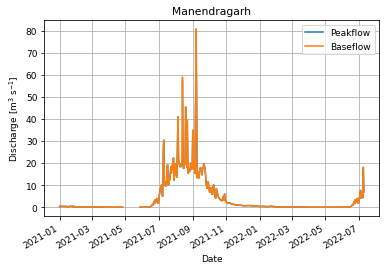

In [103]:
fig, ax = plt.subplots()
lines = plt.plot(df.index, df['Peakflow [m^3 s^-1]'] +  df['Baseflow [m^3 s^-1]'], df.index, df['Baseflow [m^3 s^-1]'])
plt.xlabel('Date')
plt.ylabel('Discharge [m$^3$ s$^{-1}$]')
plt.grid(True)
plt.title('Manendragarh') 
plt.legend(['Peakflow', 'Baseflow'])
fig.autofmt_xdate()
plt.savefig('peakflow_baseflow.png', dpi=800)